# Min Cut Lab
**Objectives:**
- Understand the formulation of a min cut instance, in particular
    - using infinite capacity edges
    - finding an s-t cut

## Part 1: Formulating the maximum density subgraph problem.
In the first part of this lab, we will introduce the maximum density subgraph problem.

The density of a graph is defined by the number of edges included in the graph divided by the number of nodes on the graph. Given $G = (V, E)$, $d = \frac{|E|}{|V|}$. In this lab, we will model the problem of finding the densest subgraph by reducing it to an instance of the Minimum Cut problem.

We will first focus on the non-optimization aspect of this problem. That is, we want to answer the question: does there exist a subset of nodes S such that the density of the subgraph it makes up is at least $\lambda$?


**Q1:** Write an equation that if satisfied, proves the existence of such a subset S. Let E(S) be the edge set induced by the nodes in S (edges going from a node in S to another node in S).

**A:** $\frac{|E(S)|}{|S|} \geq \lambda$

**Q2:** Rewrite the equation such that we have an equation of the form $a - b*c \geq 0$.

**A:** $|E(S)| - \lambda |S| \geq 0$

So, if we want to prove that there exists some subset of nodes S that has density at least l, we just need to find one such S that satisfies the equation above. Since the relationship is greater than or equal to, we can try to maximize the LHS such that if our maximum value is $\geq 0$ then we know we have found a set S that satisfies this property. Thus, our goal is

`maximize $|E(S)| - \lambda |S|$`

and we want to see if that value is $\geq 0$.

Notice that there are two components to this equation. The first part can be interpreted as receiving one unit of benefit for each edge induced by the set S we are choosing. The second part can be interpreted as paying l units of cost for every node that we include in our set S. This is similar to the tool selection problem, where we wanted to find a subset of tasks to complete given that we gain a certain amount of revenue for each task finished, but have to pay a certain cost to use the tools needed for each task. Luckily enough, that problem also had the optimization of finding such a subset such that our overall profit was positive.

Let's model the densest subgraph instance as a tool selection problem! Since we gain benefit from including edges, let the edge set of the graph, E, take the role of the tasks in the model. Similarly, let the vertex set of the graph, V, take the role of the tools in the model.

We can think of this as choosing nodes such that certain edges are induced by our subset S.

The objective function of the minimum cost reduction of the tool selection problem was to minimize the cost, which was measured by the opportunity cost of jobs not taken added with the cost of using tools for the jobs we did take.

**Q3:** In English, what are the two costs that we want to minimize for the densest subgraph problem?

**A:** the opportunity cost of not inducing an edge and the cost of including more vertices in our subgraph

Let the edge set from the original graph be $E = W \cup X$, where $W$ is the set of all edges induced by the subgraph and $X$ is the set of all edges not induced. Let the vertex set be $V = Y \cup Z$, where $Y$ is the set of all vertices included in our subgraph and $Z$ is the set of vertices not included. 

## Part 2: Using Python

We first define the graph that we want to analyze. Run the following code to see an illustration of the graph we will be using for this part of the lab.

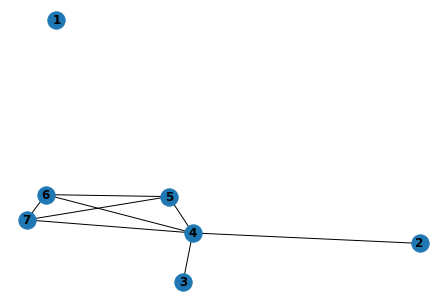

In [2]:
from max_flow import *

# define the input graph
G = nx.Graph()
edgeList = [(1,1), (2,4), (3,4), (4,5), (4,6), (4,7), (5,6), (5,7), (6,7)]
G.add_edges_from(edgeList)
nx.draw(G,with_labels=True, font_weight='bold')
plt.show()

**Q:** What do you expect to be the maximum density for this graph upon inspection?

**A:** 1.5

**Q:** What vertices do you expect to be inside subgraph with the density you answered above?

**A:** 4,5,6,7

The following code will generate the min-cut instance of the graph given above. It will then execute Ford-Fulkerson on the formulated graph and print out the max flow value as well as the list of nodes in the s side of the minimum cut. Fill in the missing pieces of code.

In [3]:
def find_max_density(G, edges, d):
    """Formulate and solve the min cut instance of the maximum density problem with the given graph [G], graph edges [edges] and given density [d]."""
    dirG = nx.DiGraph()
    sink_edges = []
    #sink will be node 0
    t=0
    labels = {t: 't'}
    
    
    #add vertex nodes
    for i in range(1, G.number_of_nodes()+1):
        # TODO: Assign a value for the capacity of the edges going into the sink node. Hint: use a given parameter.
        # sink_edges.append((i, t, XXX))
        ### BEGIN SOLUTION
        sink_edges.append((i, t, d))
        ### END SOLUTION
        labels[i] = str(i)

    
    source_edges = []
    #edge to vertex edges
    etv_edges = []
    #source will be node (num of vertices + 1)
    s = G.number_of_nodes()+1
    labels[s] = 's'
    count = s+1
    #total number of edges in the original graph that are not self loops
    total_edges = 0
    
    
    for e in edges:
        if e[0] != e[1]:
            # TODO: Assign a value for the capacity of the edges coming from the source node.
            # source_edges.append((s,count, XXX))
            ### BEGIN SOLUTION
            source_edges.append((s,count, 1))
            ### END SOLUTION
            etv_edges.append((count, e[0], math.inf))
            etv_edges.append((count, e[1], math.inf))
            labels[count] = str(e)
            count += 1
            total_edges += 1
            
            
    dirG.add_weighted_edges_from(sink_edges, 'cap' )
    dirG.add_weighted_edges_from(source_edges, 'cap' )
    dirG.add_weighted_edges_from(etv_edges, 'cap' )
    #assign labels to nodes
    for k in labels:
        dirG.nodes[k]['label'] = labels[k]
    #assign positions to nodes
    for i in range(1, G.number_of_nodes()+1):
        dirG.nodes[i]['pos'] = (40, 100-i*10)
    #last node index in the graph (index of last edge node)
    edge_length = s+1+total_edges
    for i in range(s+1, edge_length):
        dirG.nodes[i]['pos'] = (20, 100-(i-(s+1))*10)
    dirG.nodes[t]['pos'] = (60, edge_length*10//2)
    dirG.nodes[s]['pos'] = (0, edge_length*10//2)

    #solve the min cut instance
    ex= max_flow(dirG)
    ex.ford_fulkerson(s=s, t=t, show=False)
    print("Max flow value: " + str(ex.get_flow_value(t=t)))
    ex.plot_flow()
    ex.label(s=s, auto=True, show=False)
    print("Minimum s-t cut: " + str(ex.get_checked_nodes()))
    ex.plot_checked(residual=True)

Max flow value: 8.0


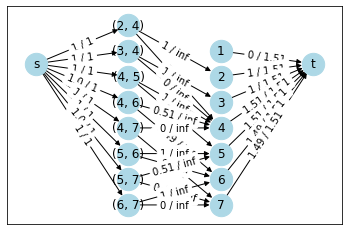

Minimum s-t cut: ['s']


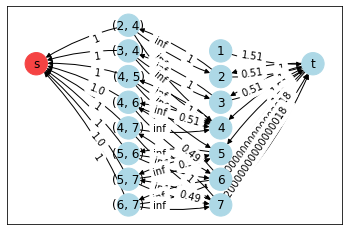

In [4]:
# TODO: Test this block of code with different values to find the maximum density.
# d = XXX
### BEGIN SOLUTION
d = 1.499
### END SOLUTION
find_max_density(G, edgeList, d)

**Q:** What was the maximum density subgraph you found?

**A:** 1.5 (1.499)

*Note that the code was slightly off here. The max density possible seemed to be "unattainable" but if you tried densities that were just below the max value, it would have given you a valid cut.

**Q:** What nodes are part of the subgraph that makes up this density?

**A:** 4,5,6,7